# IMPORT LIBRARY

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.util import random_noise

# MEMBUAT DIREKTORI DAN MEMBACA CITRA

In [2]:
if not os.path.exists('images'):
    os.makedirs('images')

# Mengunduh citra contoh (jika tidak ada file di Kaggle)
# Ini adalah URL contoh, Anda bisa ganti dengan URL gambar lain
# atau gunakan gambar yang sudah ada di dataset Kaggle Anda
import urllib.request
url = 'https://i.stack.imgur.com/uR2iR.png' # Contoh gambar
filename = '/kaggle/input/cuplikan-cctv/IP CCTV Camera (Day Vision )-Revlight Security.jpg'

if not os.path.exists(filename):
    print(f"Mengunduh gambar dari {url}...")
    urllib.request.urlretrieve(url, filename)
    print("Pengunduhan selesai.")
else:
    print(" ")

# Membaca citra
try:
    img = cv2.imread(filename)
    if img is None:
        raise FileNotFoundError(f"Tidak dapat membaca gambar dari {filename}. Pastikan path benar atau coba gambar lain.")
     # Konversi ke RGB karena OpenCV membaca dalam BGR secara default
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
except Exception as e:
    print(f"Terjadi kesalahan saat memuat gambar: {e}")
    # Jika gagal, kita bisa membuat gambar dummy
    img_rgb = np.zeros((200, 300, 3), dtype=np.uint8) + 128 # Gambar abu-abu
    print("Menggunakan gambar dummy karena gagal memuat.")

# SIMULASI FILTER NOISE

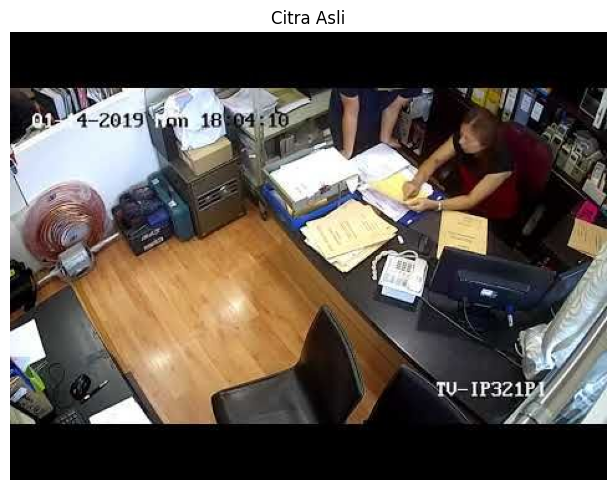

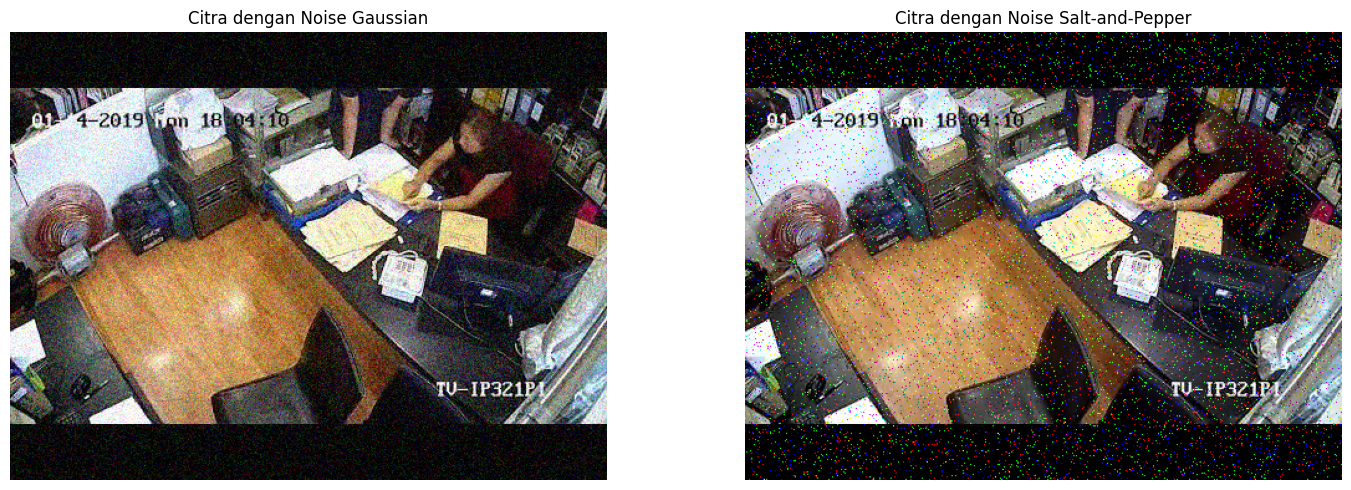

In [3]:
# Fungsi untuk menampilkan citra
def display_images(images, titles):
    plt.figure(figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Menampilkan citra asli
display_images([img_rgb], ["Citra Asli"])

# Simulasi menambahkan noise pada citra
# Kita akan tambahkan noise Gaussian dan Salt-and-Pepper
# Pertama, ubah citra ke float untuk random_noise
img_float = img_rgb / 255.0

# Tambahkan noise Gaussian
img_gaussian_noise = random_noise(img_float, mode='gaussian', var=0.01)
img_gaussian_noise = np.clip(img_gaussian_noise * 255, 0, 255).astype(np.uint8)

# Tambahkan noise Salt-and-Pepper
img_sp_noise = random_noise(img_float, mode='s&p', amount=0.05)
img_sp_noise = np.clip(img_sp_noise * 255, 0, 255).astype(np.uint8)
display_images([img_gaussian_noise, img_sp_noise], ["Citra dengan Noise Gaussian", "Citra dengan Noise Salt-and-Pepper"])

# Kita akan fokus pada citra dengan noise Gaussian untuk demonstrasi selanjutnya
# Anda bisa memilih img_sp_noise jika ingin mencoba noise salt-and-pepper
img_noisy = img_gaussian_noise

# Penjelasan Metode
Smoothing (Penghalusan) dan Noise Reduction (Peredaman Noise) adalah proses fundamental dalam pengolahan citra digital yang bertujuan untuk meningkatkan kualitas visual gambar dengan mengurangi gangguan atau "noise". Noise pada citra, seperti yang sering ditemukan pada rekaman CCTV (misalnya, bintik-bintik akibat kondisi minim cahaya), dapat mengaburkan detail penting dan menyulitkan analisis.

Metode smoothing bekerja dengan memodifikasi nilai piksel berdasarkan nilai piksel di sekitarnya dalam sebuah area kecil yang disebut kernel atau jendela. Eksplorasi dilakukan terhadap tiga filter dasar:
1. Filter Rata-rata (Mean Filter)
   - Cara Kerja: Mengganti nilai setiap piksel dengan rata-rata aritmetika dari semua piksel dalam kernel.
   - Kegunaan: Efektif untuk meredam noise acak (seperti Gaussian noise), tetapi memiliki kecenderungan untuk memburamkan tepi dan detail halus pada citra.
3. Filter Median (Median Filter)
   - Cara Kerja: Mengganti nilai setiap piksel dengan nilai median (nilai tengah setelah diurutkan) dari piksel-piksel dalam kernel.
   - Kegunaan: Sangat efektif untuk meredam noise jenis "salt-and-pepper" (titik hitam/putih acak) karena tidak terpengaruh oleh nilai ekstrem (outlier), sehingga lebih baik dalam menjaga ketajaman tepi citra dibandingkan filter rata-rata.
5. Gaussian Blur
   - Cara Kerja: Mirip dengan filter rata-rata, namun menggunakan rata-rata tertimbang berdasarkan distribusi Gaussian (piksel di dekat pusat kernel diberi bobot lebih tinggi). Tingkat kehalusan diatur oleh parameter standar deviasi.
   - Kegunaan: Menghasilkan efek penghalusan yang lebih alami dan sangat efektif untuk meredam noise Gaussian, seringkali dengan dampak yang lebih minimal pada detail tepi dibanding Mean Filter.

# MENERAPKAN FILTER SMOOTHING (grayscale)

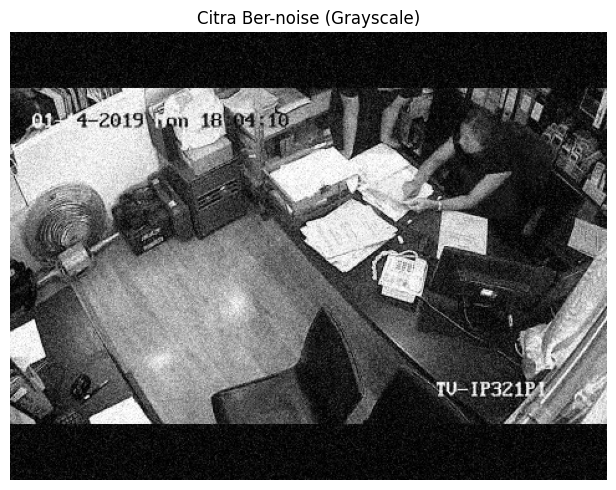

In [4]:
# Konversi citra ke grayscale jika noise reduction akan dilakukan pada channel tunggal
# Banyak filter noise reduction bekerja lebih optimal pada citra grayscale
img_gray_noisy = cv2.cvtColor(img_noisy, cv2.COLOR_RGB2GRAY)
display_images([img_gray_noisy], ["Citra Ber-noise (Grayscale)"])

# print("MENERAPKAN FILTER SMOOTHING (GRAYSCALE)")

# 2.1. Filter Rata-rata (Mean Filter)
# cv2.blur(src, ksize)
# ksize adalah ukuran kernel (jendela)
kernel_size_mean = (5, 5) # Coba ukuran kernel yang berbeda (misal 3x3, 7x7)
mean_filtered_img = cv2.blur(img_gray_noisy, kernel_size_mean)
# print(f"Filter Rata-rata diterapkan dengan kernel {kernel_size_mean}.")

# 2.2. Filter Median (Median Filter)
# cv2.medianBlur(src, ksize)
# ksize harus ganjil
kernel_size_median = 5 # Coba ukuran kernel yang berbeda (misal 3, 7)
median_filtered_img = cv2.medianBlur(img_gray_noisy, kernel_size_median)
# print(f"Filter Median diterapkan dengan kernel {kernel_size_median}.")

# 2.3. Gaussian Blur
# cv2.GaussianBlur(src, ksize, sigmaX)
# ksize adalah ukuran kernel (harus ganjil), sigmaX adalah standar deviasi di sumbu X
kernel_size_gaussian = (5, 5) # Coba ukuran kernel yang berbeda
sigma_gaussian = 0 # Jika 0, sigmaX akan dihitung dari ksize
gaussian_filtered_img = cv2.GaussianBlur(img_gray_noisy, kernel_size_gaussian, sigma_gaussian)
# print(f"Gaussian Blur diterapkan dengan kernel {kernel_size_gaussian} dan sigma {sigma_gaussian}.")

# print("\nProses filtering selesai.")

# PERBANDINGAN CITRA

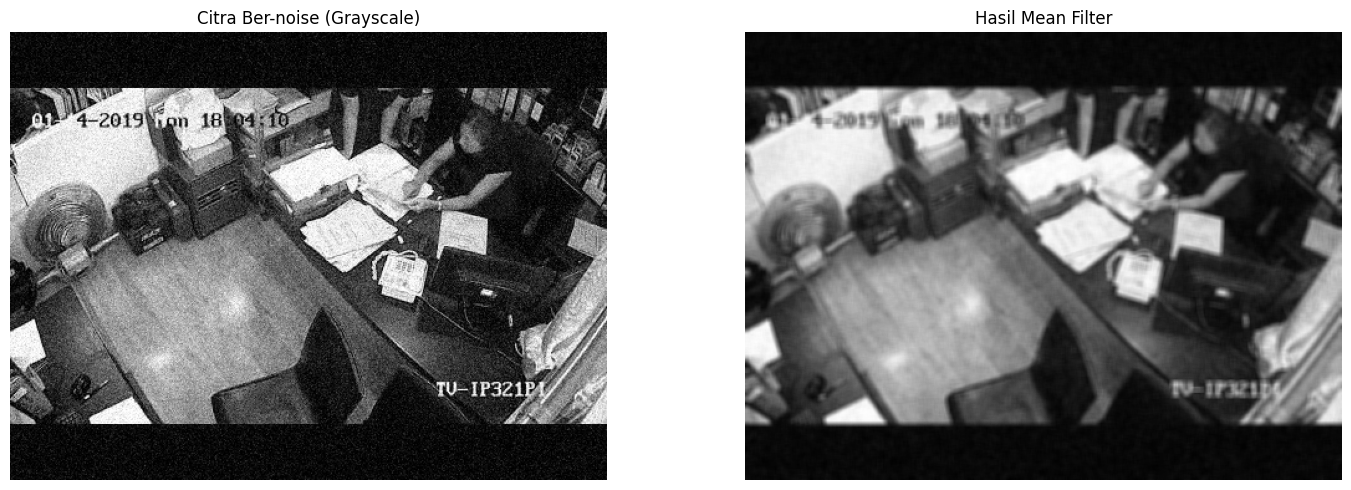

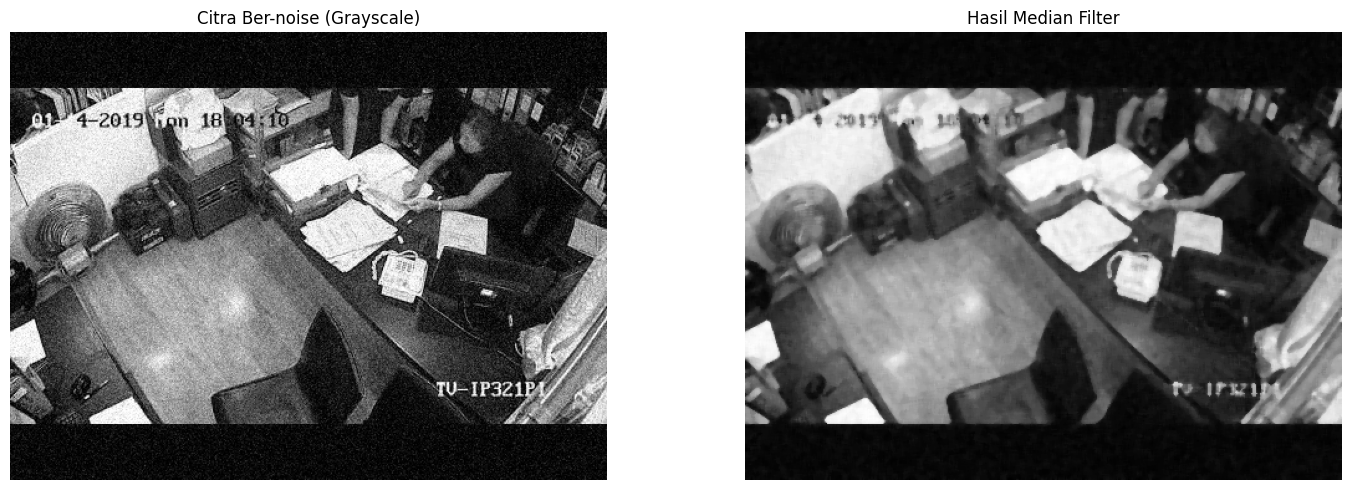

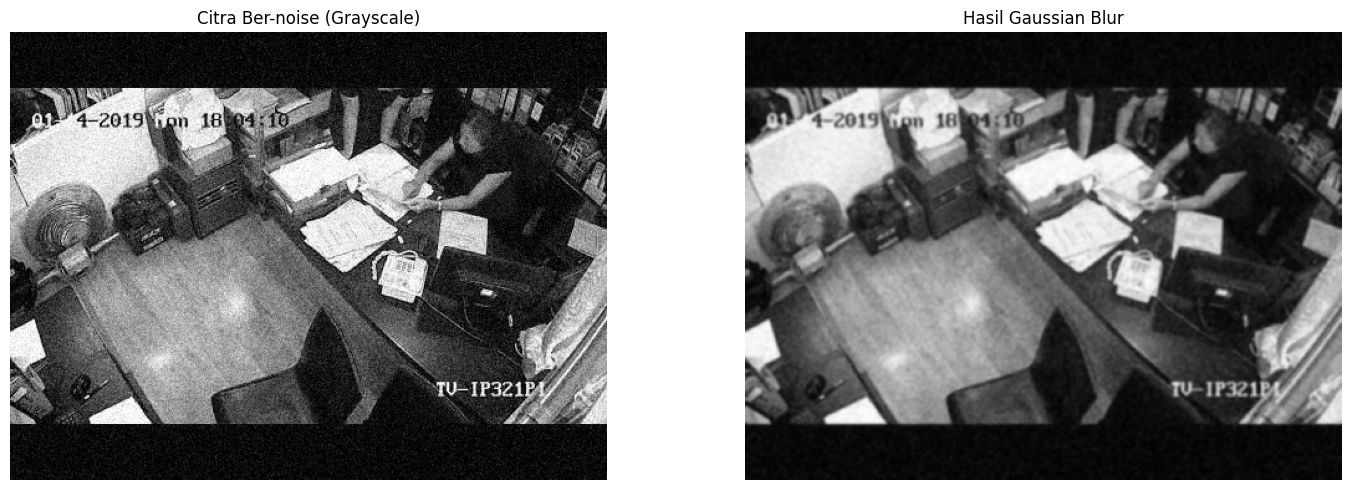

In [5]:
# Tampilkan citra sebelum dan sesudah filtering untuk setiap metode
display_images(
    [img_gray_noisy, mean_filtered_img],
    ["Citra Ber-noise (Grayscale)", "Hasil Mean Filter"]
)

display_images(
    [img_gray_noisy, median_filtered_img],
    ["Citra Ber-noise (Grayscale)", "Hasil Median Filter"]
)

display_images(
    [img_gray_noisy, gaussian_filtered_img],
    ["Citra Ber-noise (Grayscale)", "Hasil Gaussian Blur"]
)


# Hasil Eksperimen
Pada eksperimen ini, digunakan citra CCTV yang telah ditambahkan noise Gaussian secara simulasi. Setelah itu, ketiga filter yang sudah disebutkan sebelumnya diterapkan, lalu hasilnya dibandingkan dengan citra awal yang mengandung noise.

**Visualisasi Hasil:**
1. Citra Asli dengan Noise (Grayscale):
   Output: Menampilkan gambar CCTV dalam skala abu-abu yang tampak berbintik-bintik akibat noise Gaussian. Citra ini menjadi acuan awal sebelum dilakukan perbaikan.
3. Hasil Mean Filter:
   Output: Gambar terlihat lebih halus dan noise mulai berkurang. Namun, detail dan tepi objek cenderung jadi buram.
5. Hasil Median Filter:
   Output: Noise Gaussian berkurang dan tepi citra tetap cukup terjaga dibandingkan dengan Mean Filter. Walaupun median filter lebih cocok untuk noise jenis salt-and-pepper, hasilnya masih cukup baik untuk noise Gaussian, walau tidak sehalus Gaussian Blur.
7. Hasil Gaussian Blur:
   Output: Noise mereda cukup baik dan citra tampak halus secara alami. Detail tetap terlihat, dan pemburaman tepi tidak terlalu parah seperti pada Mean Filter.

# Diskusi Kelompok
 * Efektivitas Peredaman Noise:
   - Gaussian Blur paling efektif untuk meredam noise Gaussian dan hasilnya juga paling enak dilihat.
   - Mean Filter juga mampu meredam noise, tapi efek buramnya cukup terasa.
   - Median Filter sebenarnya lebih cocok untuk salt-and-pepper noise, tapi masih bisa digunakan untuk Gaussian meskipun hasilnya tidak sehalus Gaussian Blur.
 * Preservasi Detail dan Tepi Citra:
   - Mean Filter cenderung menghilangkan banyak detail dan membuat tepi objek jadi kurang tajam.
   - Median Filter cukup baik dalam menjaga ketajaman tepi karena prosesnya tidak merata-ratakan nilai.Gaussian Blur memberikan hasil yang seimbang: noise berkurang tanpa terlalu banyak menghilangkan detail penting.

**Kelebihan dan Kekurangan**
1. Mean Filter:
   * Kelebihan: Mudah dan cepat.
   * Kekurangan: Gambar jadi buram, kurang efektif untuk noise yang ekstrem.
3. Median Filter:
   * Kelebihan: Sangat cocok untuk noise salt-and-pepper, cukup baik dalam menjaga tepi.
   * Kekurangan: Detail halus bisa hilang, prosesnya sedikit lebih lama. 
5. Gaussian Blur:
   * Kelebihan: Hasil smoothing lebih alami, efektif untuk Gaussian noise, bisa diatur lewat parameter sigma.
   * Kekurangan: Tetap menyebabkan blur pada detail, kurang cocok untuk jenis noise lain seperti salt-and-pepper. 
   

